In [49]:
#!pip  install catboost
#!pip install optuna

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('/content/cleaned_accommodation_data.csv')
df

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Bangalows,KIVGA HOLIDAY HOME,"4C/8 FIRST STAGE, MIHINDU MAWATHA, ANURADHAPURA",4,A,Anuradhapura,Anuradhapura,Anuradhapura East,80.416952,8.333752
1,Bangalows,VILLA SUNBIRD,"89B, WELLAMANKARAYA, OFF HUE FERNANDO MAWATHA,...",6,A,Puttalam,Polonnaruwa,Wennappuwa,79.837662,7.306926
2,Bangalows,COMILLA BUNGALOW,"""COMILLA WATHE"" 76/5, INDURUGALLA, WATHURUGAMA",3,A,Gampaha,Gampaha,Dompe,80.094262,7.056691
3,Bangalows,SANDELLE HOLIDAY RESORT,"4C/5, STAGE ONE, MIHINDU MAWATHA, ANURADHAPURA",6,B,Anuradhapura,Anuradhapura,Anuradhapura East,NaN,NaN
4,Bangalows,SACHAL MIR'S,"2-C, DUNGALPITIYA, THALAHENA, NEGAMBO",4,A,Gampaha,Negombo,Negombo,79.831100,7.152417
...,...,...,...,...,...,...,...,...,...,...
1832,Rented Homes,LEISURE INN,"NO 35, KONGASWATTE, MELEGAMA, WADDUWA",3,B,Kalutara,Kalutara,Kalutara,NaN,NaN
1833,Rented Homes,AIRPORT NEAR REST,"245/31, CHURCH ROAD, RANAWIRU MAWATHA, LIYANAG...",1,B,Gampaha,Seeduwa,Katana,79.875283,7.136658
1834,Rented Homes,AVON VILLA,"NO. 61/30, THUDUWEGODA ROAD, AMARASENA MAWATHA...",3,B,Galle,Hikkaduwa,Hikkaduwa,80.100697,6.139111
1835,Rented Homes,SAVENRA GARDEN RESORT,"13A, RATHABALAHENA ESTATE, PADUKKA ROAD, GODAG...",5,A,Colombo,Homagama,Homagama,80.036651,6.850166


In [52]:
df = df.drop(columns=['Name', 'Logitiute', 'Latitude'], errors='ignore')

In [53]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Type            0
Address         0
Rooms           0
Grade           0
District        0
AGA Division    0
PS/MC/UC        0
dtype: int64


In [54]:
y = df['Grade']
X = df.drop(['Grade','Address'], axis=1)

categorical_features = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print("Original X shape:", X.shape)
print("Encoded X shape:", X_encoded.shape)
print("First 5 rows of encoded features (X_encoded):")
print(X_encoded.head())

Original X shape: (1837, 5)
Encoded X shape: (1837, 401)
First 5 rows of encoded features (X_encoded):
   Rooms  Type_Classified Hotels( 1-5 Star)  Type_Guest Houses  \
0      4                              False              False   
1      6                              False              False   
2      3                              False              False   
3      6                              False              False   
4      4                              False              False   

   Type_Heritage Bungalows  Type_Heritage Homes  Type_Home Stay Units  \
0                    False                False                 False   
1                    False                False                 False   
2                    False                False                 False   
3                    False                False                 False   
4                    False                False                 False   

   Type_Rented Apartments  Type_Rented Homes  District_Anurad

In [55]:
X_encoded

,Rooms,Type_Classified Hotels( 1-5 Star),Type_Guest Houses,Type_Heritage Bungalows,Type_Heritage Homes,Type_Home Stay Units,Type_Rented Apartments,Type_Rented Homes,District_Anuradhapura,District_Badulla,...,PS/MC/UC_Weligama,PS/MC/UC_Welimada,PS/MC/UC_Welipitiya,PS/MC/UC_Wellawaya,PS/MC/UC_Wennappuwa,PS/MC/UC_Wilgamuwa,PS/MC/UC_Yakkalamulla,PS/MC/UC_Yatinuwara,PS/MC/UC_Yatiyanthota,PS/MC/UC_kaduwela
0,4,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,6,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,3,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1833,1,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1834,3,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1835,5,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
import catboost as cb
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Initialize the CatBoost Classifier
catboost = cb.CatBoostClassifier(random_state=42, verbose=0)

# Define evaluation metrics for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall_weighted': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0)
}

# Set up Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(catboost, X_encoded, y, cv=kf, scoring=scoring, return_train_score=False)

print("Cross-Validation Results:")
for metric, values in cv_results.items():
    if metric.startswith('test_'):
        print(f"  {metric[5:].replace('_', ' ').title()}: {values.mean():.4f} (+/- {values.std():.4f})")


Cross-Validation Results:
  Accuracy: 0.6587 (+/- 0.0336)
  Precision Weighted: 0.6465 (+/- 0.0361)
  Recall Weighted: 0.6587 (+/- 0.0336)
  F1 Weighted: 0.6473 (+/- 0.0343)


# Hyper parameter Tuning

In [58]:
import optuna

def objective(trial):
    # 2. Suggest hyperparameters
    params = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        'bootstrap_type': 'Bernoulli', # Changed bootstrap_type to support subsample
        'random_state': 42,
        'verbose': 0,
        'loss_function': 'MultiClass'
    }

    # 3. Initialize CatBoost Classifier
    model = cb.CatBoostClassifier(**params)

    # 4. Perform Stratified K-Fold cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(model, X_encoded, y, cv=kf, scoring='accuracy', return_train_score=False)

    # 6. Calculate the mean of the test_accuracy
    mean_accuracy = cv_results['test_accuracy'].mean()

    # 7. Return this mean accuracy
    return mean_accuracy

print("Objective function 'objective' defined successfully with compatible bootstrap_type.")

Objective function 'objective' defined successfully with compatible bootstrap_type.


In [60]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Number of finished trials:", len(study.trials))
print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value:.4f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-11-23 03:59:51,064] A new study created in memory with name: no-name-8d91eb3b-4f58-4cf4-b464-37518169e459
[I 2025-11-23 04:00:21,204] Trial 0 finished with value: 0.63037999052245 and parameters: {'iterations': 316, 'learning_rate': 0.2118400289616396, 'depth': 9, 'l2_leaf_reg': 0.00020845925284498042, 'subsample': 0.9268531616303981, 'colsample_bylevel': 0.7409294152451188}. Best is trial 0 with value: 0.63037999052245.
[I 2025-11-23 04:00:24,401] Trial 1 finished with value: 0.6461734391659756 and parameters: {'iterations': 245, 'learning_rate': 0.21786699108589236, 'depth': 5, 'l2_leaf_reg': 4.5429372598049774e-07, 'subsample': 0.6971856917491043, 'colsample_bylevel': 0.9318559040427512}. Best is trial 1 with value: 0.6461734391659756.
[I 2025-11-23 04:00:26,772] Trial 2 finished with value: 0.6434723374007818 and parameters: {'iterations': 113, 'learning_rate': 0.01916736044683599, 'depth': 6, 'l2_leaf_reg': 0.00048325588177568137, 'subsample': 0.6874682339341622, 'colsampl

Number of finished trials: 50
Best trial:
  Value: 0.6777
  Params: 
    iterations: 402
    learning_rate: 0.01791395502328103
    depth: 8
    l2_leaf_reg: 3.9160371306219806e-07
    subsample: 0.8552767817986295
    colsample_bylevel: 0.9395335992598651


In [61]:
best_params = study.best_params

# Train a final CatBoost model with the best hyperparameters
final_model = cb.CatBoostClassifier(
    iterations=best_params['iterations'],
    learning_rate=best_params['learning_rate'],
    depth=best_params['depth'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    subsample=best_params['subsample'],
    colsample_bylevel=best_params['colsample_bylevel'],
    bootstrap_type='Bernoulli',
    random_state=42,
    verbose=0,
    loss_function='MultiClass'
)

final_model.fit(X_encoded, y)

print("Final CatBoost model trained with optimized hyperparameters.")

Final CatBoost model trained with optimized hyperparameters.


### Model Evaluation




In [62]:
print("Cross-Validation Results with Best Hyperparameters:")
for metric, values in cv_results.items():
    if metric.startswith('test_'):
        print(f"  {metric[5:].replace('_', ' ').title()}: {values.mean():.4f} (+/- {values.std():.4f})")


Cross-Validation Results with Best Hyperparameters:
  Accuracy: 0.6587 (+/- 0.0336)
  Precision Weighted: 0.6465 (+/- 0.0361)
  Recall Weighted: 0.6587 (+/- 0.0336)
  F1 Weighted: 0.6473 (+/- 0.0343)


In [63]:
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_encoded)
report = classification_report(y, y_pred)

print("Classification Report for the Final Model on the Entire Dataset:")
print(report)


Classification Report for the Final Model on the Entire Dataset:
              precision    recall  f1-score   support

           A       0.74      0.89      0.81      1033
           B       0.73      0.58      0.65       730
           C       1.00      0.30      0.46        74

    accuracy                           0.74      1837
   macro avg       0.83      0.59      0.64      1837
weighted avg       0.75      0.74      0.73      1837



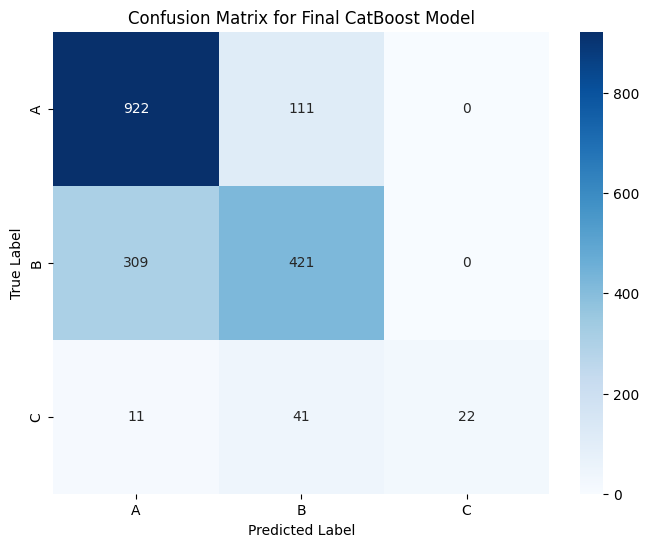

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the final model
y_pred = final_model.predict(X_encoded)

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)

# Get unique class labels from y
class_labels = sorted(y.unique())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Final CatBoost Model')
plt.show()
